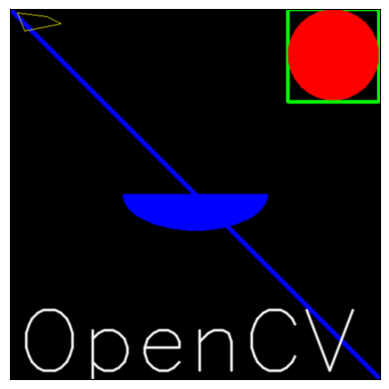

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as pyplot

# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(0,0,255),5)

img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
img = cv2.circle(img,(447,63), 63, (255,0,0), -1)
img = cv2.ellipse(img, (256,256), (100,50), 0,0,180, (0,0,255),-1)  # 파란색으로 타원 그리기




pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(255,255,0))



font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)


plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()


In [7]:
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [11]:
import cv2
import numpy as np
import random

# Create a black image
img = np.zeros((512, 512, 3), np.uint8)

# Mouse callback function
def draw_random_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Generate a random radius between 10 and 100
        radius = random.randint(10, 100)
        # Generate random BGR color
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.circle(img, (x, y), radius, color, -1)

# Create a window and bind the function to the window
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_random_circle)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:  # Press 'Esc' key to exit
        break

cv2.destroyAllWindows()

In [17]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),30,(random.randrange(0,255),random.randrange(0,255),random.randrange(0,255)),3)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'mouse-('+str(x)+','+str(y)+')',(10,40), font, 1,(255,255,255),2,cv2.LINE_AA)